In [12]:
#Paso 1: Instalar las librerías necesarias
install.packages("dagitty")
install.packages("ggdag")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("broom")
install.packages("stargazer")   # para exportar tablas

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#Paso 2: Cargar las librerías
library(dagitty)
library(ggdag)
library(ggplot2)
library(dplyr)
library(broom)
library(stargazer)


Attaching package: ‘ggdag’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




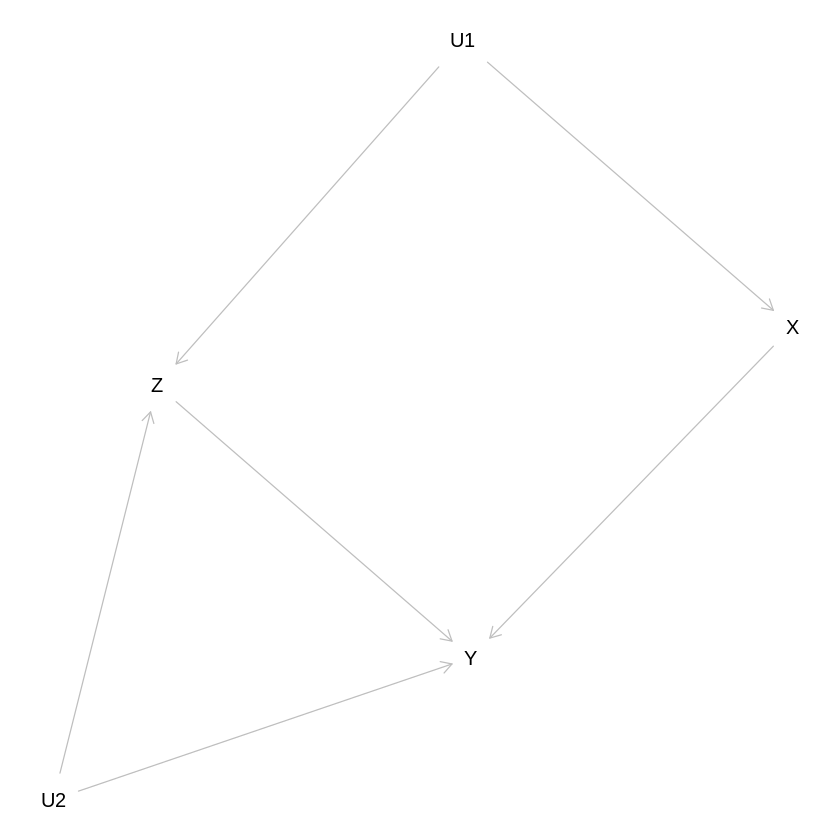

In [3]:
#Paso 3: Definir y graficar el DAG inicial (Ejemplo 4: Damned if you do, damned if you don’t)
# DAG original
dag1 <- dagitty("dag {
  U1 -> X
  U1 -> Z
  U2 -> Z
  U2 -> Y
  X -> Y
  Z -> Y
}")

plot(graphLayout(dag1))

In [4]:
#Paso 4: Simular datos de acuerdo al DAG
set.seed(123)

n <- 2000
U1 <- rnorm(n)
U2 <- rnorm(n)
Z  <- 0.6*U1 + 0.8*U2 + rnorm(n)
X  <- 0.7*U1 + rnorm(n)
Y  <- 1*X + 0.5*Z + 0.8*U2 + rnorm(n)

data <- data.frame(Y, X, Z, U1, U2)
head(data)

,Y,X,Z,U1,U2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.2643529,-1.09156106,-0.5490186,-0.56047565,-0.5116037
2,3.1836489,0.83532729,0.7015570,-0.23017749,0.2369379
3,-1.1510569,0.39835047,1.1729578,1.55870831,-0.5415892
4,1.0754684,-0.05412717,-0.2664706,0.07050839,1.2192276
5,-0.3400521,0.69436748,-1.8092282,0.12928774,0.1741359
6,1.0918363,0.59250051,2.7421504,1.71506499,-0.6152683


In [5]:
#Paso 5: Regresiones con y sin controlar por Z
# Sin Z
model1 <- lm(Y ~ X, data = data)

# Con Z
model2 <- lm(Y ~ X + Z, data = data)

summary(model1)
summary(model2)


Call:
lm(formula = Y ~ X, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7455 -1.1547  0.0265  1.1164  6.6005 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02324    0.03794  -0.613     0.54    
X            1.16103    0.03116  37.259   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.697 on 1998 degrees of freedom
Multiple R-squared:   0.41,	Adjusted R-squared:  0.4097 
F-statistic:  1388 on 1 and 1998 DF,  p-value: < 2.2e-16



Call:
lm(formula = Y ~ X + Z, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4078 -0.8471 -0.0009  0.7737  4.3128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02776    0.02727  -1.018    0.309    
X            0.93232    0.02301  40.523   <2e-16 ***
Z            0.86362    0.01996  43.270   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.219 on 1997 degrees of freedom
Multiple R-squared:  0.6955,	Adjusted R-squared:  0.6952 
F-statistic:  2280 on 2 and 1997 DF,  p-value: < 2.2e-16


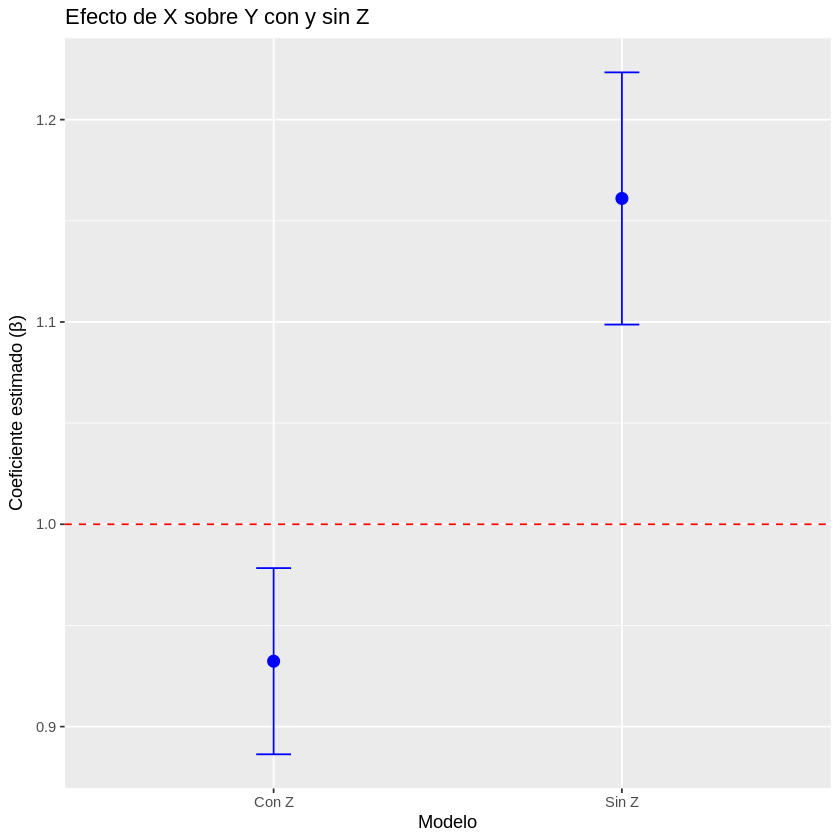

In [6]:
#Paso 6: Graficar coeficientes de X con y sin Z
results <- bind_rows(
  tidy(model1) %>% filter(term=="X") %>% mutate(model="Sin Z"),
  tidy(model2) %>% filter(term=="X") %>% mutate(model="Con Z")
)

ggplot(results, aes(x=model, y=estimate, ymin=estimate-2*std.error, ymax=estimate+2*std.error)) +
  geom_point(size=3, color="blue") +
  geom_errorbar(width=0.1, color="blue") +
  geom_hline(yintercept=1, linetype="dashed", color="red") +
  labs(title="Efecto de X sobre Y con y sin Z",
       y="Coeficiente estimado (β)", x="Modelo")

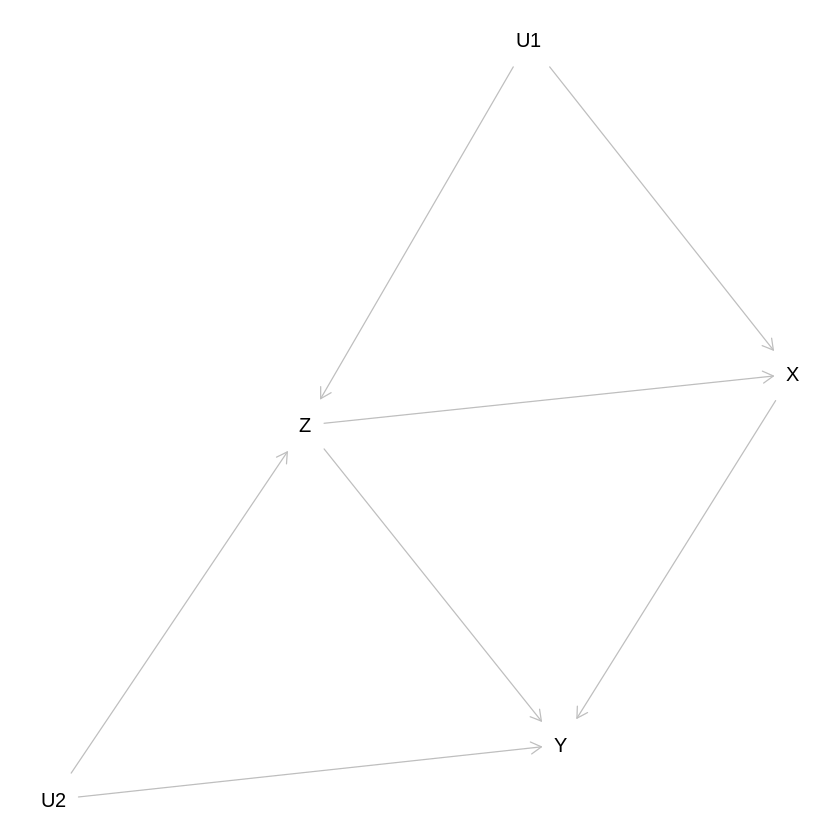

In [7]:
#Paso 7: Modificar el DAG para que Z → X
dag2 <- dagitty("dag {
  U1 -> X
  U1 -> Z
  U2 -> Z
  U2 -> Y
  X -> Y
  Z -> Y
  Z -> X
}")

plot(graphLayout(dag2))

In [8]:
#Paso 8: Simulación con el nuevo DAGset.seed(456)

Z  <- 0.6*U1 + 0.8*U2 + rnorm(n)
X  <- 0.7*U1 + 0.5*Z + rnorm(n)
Y  <- 1*X + 0.5*Z + 0.8*U2 + rnorm(n)

data2 <- data.frame(Y, X, Z, U1, U2)

In [9]:
#Paso 9: Todas las regresiones con combinaciones de Z, U1, U2 (2³ = 8 modelos)
controls <- list(
  c(), c("Z"), c("U1"), c("U2"),
  c("Z","U1"), c("Z","U2"), c("U1","U2"), c("Z","U1","U2")
)

results <- data.frame()

for (ctrl in controls){
  formula <- as.formula(paste("Y ~ X", if(length(ctrl)>0) paste("+", paste(ctrl, collapse="+")) else ""))
  model <- lm(formula, data=data2)
  res <- tidy(model) %>% filter(term=="X") %>%
    select(estimate, std.error) %>%
    mutate(controls=paste(ctrl, collapse=","))
  results <- bind_rows(results, res)
}

results

estimate,std.error,controls
<dbl>,<dbl>,<chr>
1.4227118,0.02252110,
0.8942456,0.02298112,Z
1.5199690,0.02952699,U1
1.2529667,0.01658515,U2
0.9897030,0.02728260,"Z,U1"
1.0058609,0.01963437,"Z,U2"
1.2092460,0.02241172,"U1,U2"
1.0025725,0.02309452,"Z,U1,U2"


In [11]:
#Paso 10: Mostrar tabla bonita y exportar a /output
# Crear carpeta output si no existe
if(!dir.exists("output")) dir.create("output")

# Exportar tabla
stargazer(results, summary=FALSE, rownames=FALSE,
          title="Resultados de regresiones (Parte 3)",
          out="output/regression_results.txt")


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Sat, Oct 04, 2025 - 05:51:51 PM
\begin{table}[!htbp] \centering 
  \caption{Resultados de regresiones (Parte 3)} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
estimate & std.error & controls \\ 
\hline \\[-1.8ex] 
$1.423$ & $0.023$ &  \\ 
$0.894$ & $0.023$ & Z \\ 
$1.520$ & $0.030$ & U1 \\ 
$1.253$ & $0.017$ & U2 \\ 
$0.990$ & $0.027$ & Z,U1 \\ 
$1.006$ & $0.020$ & Z,U2 \\ 
$1.209$ & $0.022$ & U1,U2 \\ 
$1.003$ & $0.023$ & Z,U1,U2 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 
